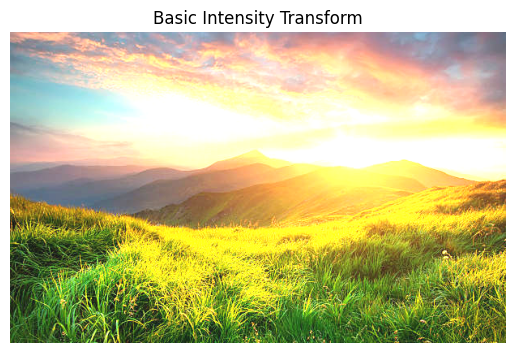

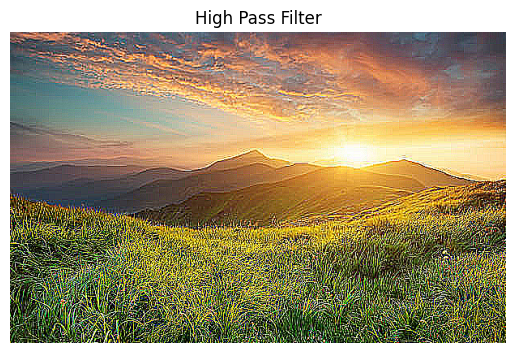

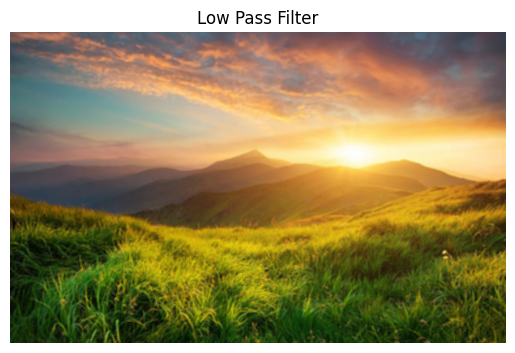

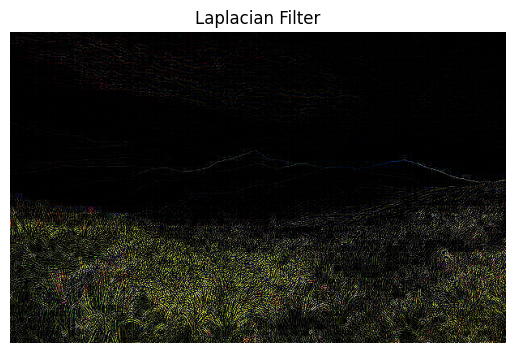

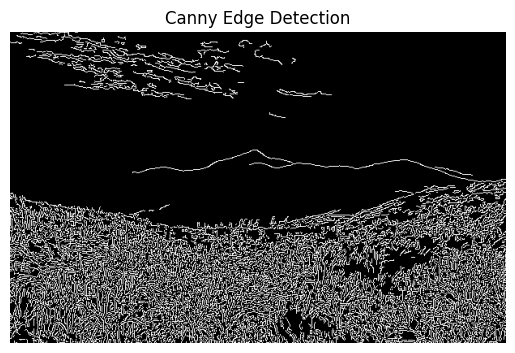

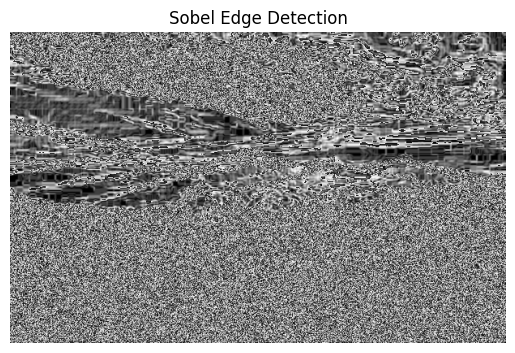

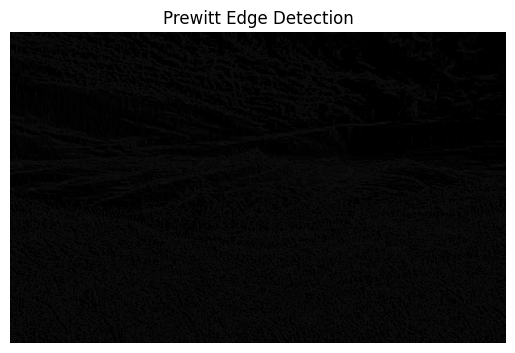

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def basic_intensity_transform(image, alpha=1.0, beta=0):
    """Perform basic intensity transformation."""
    transformed_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return transformed_image

def apply_filter(image, filter_type='high_pass'):
    """Apply convolution filter."""
    if filter_type == 'high_pass':
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    elif filter_type == 'low_pass':
        kernel = np.ones((3, 3), np.float32) / 9
    elif filter_type == 'laplacian':
        kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    else:
        raise ValueError("Invalid filter type. Choose 'high_pass', 'low_pass', or 'laplacian'.")

    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

def edge_detection(image, method='canny'):
    """Perform edge detection."""
    if method == 'canny':
        edge_image = cv2.Canny(image, 100, 200)
    elif method == 'sobel':
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
        edge_image = np.sqrt(sobelx**2 + sobely**2)
        edge_image = np.uint8(edge_image)
    elif method == 'prewitt':
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
        kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        prewittx = cv2.filter2D(gray_image, -1, kernelx)
        prewitty = cv2.filter2D(gray_image, -1, kernely)
        edge_image = np.sqrt(prewittx**2 + prewitty**2)
        edge_image = np.uint8(edge_image)
    else:
        raise ValueError("Invalid edge detection method. Choose 'canny', 'sobel', or 'prewitt'.")
    return edge_image

def display_image(image, title=''):
    """Display the image."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = "Q333/12.jpg"  # Provide the path to your image
image = cv2.imread(image_path)

# Basic Intensity Transform
transformed_image = basic_intensity_transform(image, alpha=1.5, beta=20)
display_image(transformed_image, title='Basic Intensity Transform')

# Convolution Filters
high_pass_filtered_image = apply_filter(image, filter_type='high_pass')
low_pass_filtered_image = apply_filter(image, filter_type='low_pass')
laplacian_filtered_image = apply_filter(image, filter_type='laplacian')
display_image(high_pass_filtered_image, title='High Pass Filter')
display_image(low_pass_filtered_image, title='Low Pass Filter')
display_image(laplacian_filtered_image, title='Laplacian Filter')

# Edge Detection
canny_edge_image = edge_detection(image, method='canny')
sobel_edge_image = edge_detection(image, method='sobel')
prewitt_edge_image = edge_detection(image, method='prewitt')
display_image(canny_edge_image, title='Canny Edge Detection')
display_image(sobel_edge_image, title='Sobel Edge Detection')
display_image(prewitt_edge_image, title='Prewitt Edge Detection')
